# Exploration03 Classification Examples
###### 온라인 코어 2기 박수경

사이킷런에 내장된 데이터셋을 불러와 머신러닝을 통한 분류기 모델을 작성해 봅니다. 각각의 분류 문제에서 다양한 모델을 만들어 보고, 적절한 평가지표를 이용해 모델의 성능을 평가합니다.

실습은 머신러닝의 지도학습을 연습하는 과정입니다. 지도학습에는 paired data가 정확이 짝지어져 있는, 정답이 있는 데이터를 이용한다고 이해할 수 있습니다. 특히 카테고리가 정해져 있는 분류 문제는 대표적인 지도학습 문제입니다. 분류 문제를 위하여 Decision Tree 모델을 사용합니다.

# 1. Digits  Classification

## 1) 필요한 모듈 import하기

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## 2) 데이터 준비

In [3]:
from sklearn.datasets import load_digits #사이킷런 내장 데이터셋에서 함수 불러오기

digits = load_digits() #데이터 로딩.

print(dir(digits))
print(type(digits)) # Dictionary 자료형과 유사한 sklearn.utils.Bunch 자료형 
digits.keys()

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## 3) 데이터 이해하기

사이킷런 내장 데이터셋에서 load_digit 함수를 불러옵니다. 사이킷런 데이터셋을 이용하는 기본적인 방법은 다음과 같습니다. 먼저 데이터셋의 데이터를 로딩해 와서 변수에 할당합니다. dir을 이용해 객체의 attribute와 method를 확인할 수 있습니다. keys 메서드로는 테이터셋에 담긴 정보의 종류를 알 수 있습니다.  
'feature_names', 'target_names' 라는 속성은 데이터가 담고 있는 각 피처의 이름과 타겟을 확인할 수 있습니다.  
**피처와 타겟 네임을 출력해 봅니다.**

In [4]:
print(digits.feature_names)
print(digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


데이터셋의 '.data' 속성은 데이터셋의 배열정보를 나타냅니다. 배열 정보를 새로운 변수에 할당합니다. DESCR로 데이터셋의 특성을 볼 수 있습니다. 데이터에 대한 이해를 위해 읽어보면, 이 데이터셋은 손으로 쓴 숫자 이미지를 포함하고 있으며 10개의 클래스는 각 숫자를 나타냄을 알 수 있습니다. 32x32 비트맵의 4x4의 중복되지 않는 블록에 담긴 픽셀의 수가 8x8의 행렬으로 표현되어 있습니다.

즉 **피처데이터**는 각 블록에 담긴 픽셀의 수인 64개, **레이블 데이터**는 (0~9까지의 각 숫자인) 10개라고 할 수 있겠습니다.

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
digits_data = digits.data
digits_data.shape  # (손글씨 이미지의 개수, 이미지 당 Pixel 수)

(1797, 64)

In [7]:
df_digits = pd.DataFrame(digits_data)
df_digits.head()
df_digits.describe() #피처 0~63까지, 그 속의 픽셀값은 min 0 , max 16임을 확인할 수 있다.

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [8]:
digits_data[0] # 각 이미지가 64개의 Pixel로 구성된 것을 확인할 수 있습니다.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

데이터가 나타내는 것이 이미지 이므로, 이미지화 해 보려고 합니다.\
맷플롯립의 %matplotlib inline 은 IPython에서 제공하는, rich output(그림, 소리, 애니메이션 등)을 표현하게 해 주는 기능입니다. 이를 통해 웹 브라우저로 직접 볼 수 있습니다.  
(참고: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline)

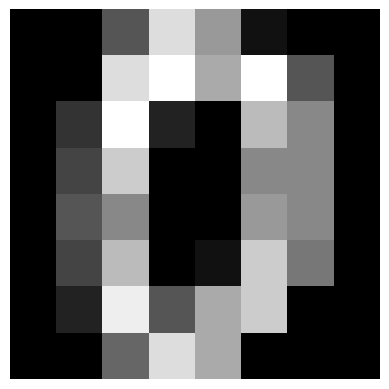

In [9]:
%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해주는 역할

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off') #행렬의 이미지표현을 위해 축의 표시를 off해 줍니다.
plt.show()

모든 숫자들을 다 이미지로 표현해 봅니다. 한 캔버스에 여러개의 그래프나 도표 등을 표현할 때는 subplot을 이용합니다. (subplot과 subplots는 사용법이 조금 다릅니다. 표현하고자 하는 내용의 수와, 특징에 맞게 적절히 선택해야 합니다.)

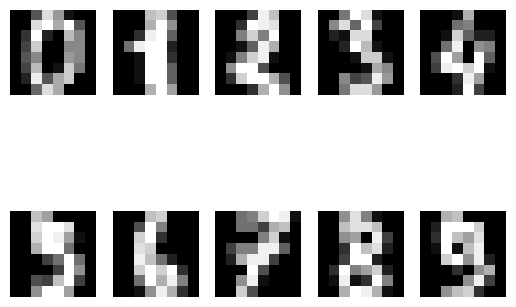

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    plt.axis('off') 
plt.show()

In [11]:
digits_label = digits.target #어떤 숫자를 나타내는지를 예측해야 합니다.
print(digits_label.shape)
digits_label[:40]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [12]:
df_digits['number'] = digits.target
df_digits

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


## 4) train, test 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=1004)


In [15]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [16]:
X_test.shape, y_test.shape

((360, 64), (360,))

## 5) 다양한 모델로 학습시켜보기

다양한 모델을 통해 학습을 진행하고 결과를 봅니다. 이번 실습에서는 다음과 같은 모델을 활용합니다.  
- Decision Tree  
- Random Forest  
- SVM  
- SGD Classifier  
- Logistic Regression  

모델들은 각각의 하이퍼파라미터를 조정하여 더 높은 성능을 가질 수 있습니다. 각각의 모델 하이퍼파라미터들을 적절하게 맞추어 줍니다.

In [17]:
from sklearn.metrics import classification_report

### 의사결정나무 (Decision Tree)

In [18]:

from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier( criterion = 'entropy', 
    max_depth = 8, 
    min_samples_split = 3,
    min_samples_leaf=2,
    random_state=1004)
model_tree.fit(X_train, y_train) # 의사결정나무 모델로 학습
y_pred1 = model_tree.predict(X_test) # 테스트 결과 예측

accuracy_tree = accuracy_score(y_test, y_pred1)
accuracy_tree # 정확도 출력



0.9055555555555556

사이킷런의 분류 성능평가를 위해 내부적으로 여러가지 지표들이 지원됩니다. 가장 간단하게 accuracy를 사용할 수 있으며 classification_report를 통해 지표들을 확인할 수 있습니다.  
결과를 지표로 나타냅니다.

In [19]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       0.95      0.97      0.96        37
           2       0.92      0.88      0.90        26
           3       0.90      0.84      0.87        45
           4       0.93      0.82      0.87        33
           5       0.91      0.78      0.84        37
           6       0.91      1.00      0.95        31
           7       0.88      0.96      0.91        45
           8       0.92      0.95      0.93        37
           9       0.84      0.86      0.85        37

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.90       360



일반적으로 평가 지표 중 정확도만으로 그 모델의 성능을 기술할 수는 없습니다. 왜냐하면 정확도는 전체 개수 중 맞은 개수만을 나타내기 때문입니다. confusion matrix는 분류 모델이 얼마나 헷갈리고(confused) 있는지를 함께 보여주는 지표입니다.

### 랜덤포레스트 (Random Forest)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=130, max_depth=8, random_state=1004)
model_rf.fit(X_train, y_train)
pred2 = model_rf.predict(X_test)
accuracy_score(y_test, pred2)

0.9666666666666667

In [21]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        26
           3       0.97      0.87      0.92        45
           4       1.00      1.00      1.00        33
           5       0.95      0.95      0.95        37
           6       0.97      1.00      0.98        31
           7       0.94      1.00      0.97        45
           8       0.94      0.92      0.93        37
           9       0.97      0.97      0.97        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### SVM (Support Vector Machine)

Support Vector Machine은 Support Vector와 Hyperplane을 이용한 선형 분류 모델로, 이진 분류를 할 때 바운더리(결정 경계)와 서포트 벡터 (결정 경계로부터 가까운 데이터), 마진 (서포트벡터와 바운더리의 거리)를 통해 데이터의 특징을 표시할 수 있습니다. 두 클래스가 얼마나 명확하게 구분될 수 있는지 시각적으로도 확인할 수 있습니다. 다중 분류 모델에서도 OvO, OvR 방식을 통해 분류를 수행할 수 있습니다.

In [22]:
from sklearn import svm #Support Vector Machine을 import
model_svm = svm.SVC(kernel='rbf', degree= 10 ) 
print(model_svm._estimator_type) # 이 모델이 어떤 타입인지 확인한다.

classifier


In [23]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [24]:
model_svm.fit(X_train, y_train) # 훈련
y_pred3 = model_svm.predict(X_test) # 예측

print(classification_report(y_test, y_pred3)) # 결과 지표를 확인
accuracy_score(y_test, y_pred3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        37
           2       0.96      1.00      0.98        26
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        33
           5       1.00      0.95      0.97        37
           6       0.97      1.00      0.98        31
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        37
           9       0.97      1.00      0.99        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



0.9916666666666667

### SGD (Stochastic Gradient Descent)

SGD (Stochastic Gradient Descent)는 배치 크기가 1인 경사하강법 알고리즘입니다. 즉, 확률적 경사하강법은 데이터 세트에서 무작위로
균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산합니다.

In [25]:
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier() # 모델 객체 생성

print(sgd_model._estimator_type) # 이 모델의 타입을 확인
sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.

classifier


SGDClassifier()

In [26]:

y_pred4 = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test, y_pred4)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.86      1.00      0.92        37
           2       1.00      1.00      1.00        26
           3       0.98      0.91      0.94        45
           4       0.97      0.94      0.95        33
           5       0.97      0.92      0.94        37
           6       0.97      1.00      0.98        31
           7       0.98      0.98      0.98        45
           8       0.91      0.86      0.89        37
           9       0.95      0.97      0.96        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Logistic Regression

Logistic Regression은 가장 널리 알려진 선형 분류 알고리즘. 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘이며, 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 합니다. 이름은 회귀지만, 실제로는 분류를 수행합니다.
다중클래스분류알고리즘이기 때문에 클래스가 0~9, 10개인 숫자분류에도 적합합니다. 하이퍼파라미터 중 solver를 liblinear로 설정하면 작은 데이터에 적합합니다.

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear').fit(X_train, y_train) 

print(logistic_model._estimator_type) # 이 모델의 타입을 확인

classifier


In [28]:
y_pred5 = logistic_model.predict(X_test) 

print(classification_report(y_test, y_pred5,)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.90      0.97      0.94        37
           2       1.00      1.00      1.00        26
           3       0.98      0.93      0.95        45
           4       1.00      0.94      0.97        33
           5       0.97      0.95      0.96        37
           6       0.97      1.00      0.98        31
           7       1.00      0.98      0.99        45
           8       0.89      0.92      0.91        37
           9       0.97      1.00      0.99        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## 6) 모델을 평가해 보기

분류 모델을 평가하는 지표로 많이 쓰이는 것은 오차행렬로 계산할 수 있는 precision,recall,f1 score,accuracy,fall-out과 ROC-AUC, Log-Loss, support-confidence-lift 등 입니다.  
참고:https://rk1993.tistory.com/entry/%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8  

숫자의 클래스를 인식하여 분류하는 것은 보안문자 입력, 손글씨 인식으로 전화번호, 우편번호, 생일 등의 데이터 저장 등에 쓰입니다. 따라서 **얼마나 많이 맞췄는가, 얼마나 정확한가**가 함께 중요하다고 생각했습니다.예를 들어 숫자 9를 9라고 인식하는 경우에는 의미가 있지만, 그 이외의 틀린 경우에는 어떤 숫자라고 예측했는지는 중요하지 않기 때문입니다. 따라서 오차행렬을 기반으로 모델의 성능을 평가하기로 했고 그 중에서도 **accuracy를 가장 우선적인 지표**로 생각했습니다.  
accuracy를 기준으로 하면 가장 성능이 좋은 모델은 SVM (Support Vector Machine)이었습니다. SVM은 기본적으로 이진 분류 모델이지만 다중 클래스 분류를 할 때 이와 같은 이진 분류 알고리즘 모델을 선택하면, 내부적으로 자동으로 OvR, OvO를 실행하게 됩니다. (참고: https://dongsam-memo.tistory.com/24) 따라서 숫자 분류를 실행하면서 SVM 모델은 내부적으로 OvO (One versus One)의 방법으로 다중 분류를 실행한 것입니다. 정확도는 99%로 산출되었습니다.

# 2. Wine  Classification

## 1) 데이터 준비

In [29]:
from sklearn.datasets import load_wine #사이킷런 내장 데이터셋에서 함수 불러오기

wine = load_wine() #데이터 로딩.

print(dir(wine))
print(type(wine)) # Dictionary 자료형과 유사한 sklearn.utils.Bunch 자료형 
wine.keys()

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## 2) 데이터 이해하기

wine 데이터의 feature들의 이름과 target의 이름, 개수를 확인합니다.

In [30]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [31]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [32]:
wine_data = wine.data
wine_data.shape  # (와인 데이터의 개수, 정보의 개수 (피처 개수))를 나타냅니다.

(178, 13)

In [33]:
df_wine = pd.DataFrame(wine_data)
df_wine.head()
df_wine.describe() #피처 개수와 기술통계량을 확인할 수 있다.

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [34]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


결측값이 없는 데이터임을 알 수 있습니다. 또한 위의 기술통계량을 확인하니 전체적으로 표준편차가 적은 피처들이 많았습니다. 이는 작은 범위 내에서 미세한 량에 따라 분류가 나누어지게 됨을 의미합니다. 마지막 피처인 와인의 proline(와인의 아미노산의 일종)은 편차가 큼을 확인할 수 있습니다.

In [35]:
wine_label = wine.target 
print(wine_label.shape)

(178,)


In [36]:
df_wine['class'] = wine.target
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


178개의 데이터 개수와, 0, 1, 2 세 그룹의 클래스를 확인했습니다. 데이터의 양이 작은 편이며 분류 클래스 개수도 적은 편이라고 할 수 있습니다. 가장 편차가 큰 컬럼인 12(proline)의 분포를 히스토그램으로 확인하고 이어서 다른 피처들의 비율도 히스토그램으로 알아봅니다.

<AxesSubplot:>

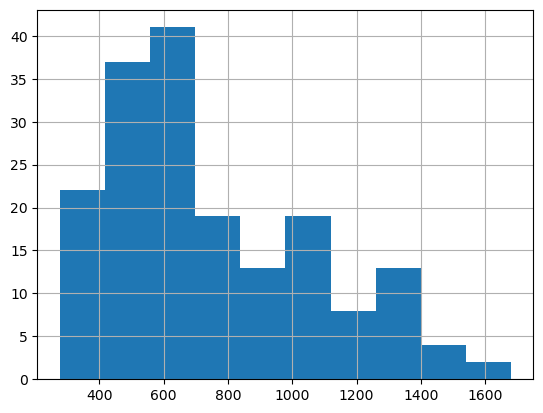

In [37]:
df_wine[12].hist()

(array([13., 24., 14., 12., 12., 32., 28., 25., 15.,  3.]),
 array([1.27 , 1.543, 1.816, 2.089, 2.362, 2.635, 2.908, 3.181, 3.454,
        3.727, 4.   ]),
 <BarContainer object of 10 artists>)

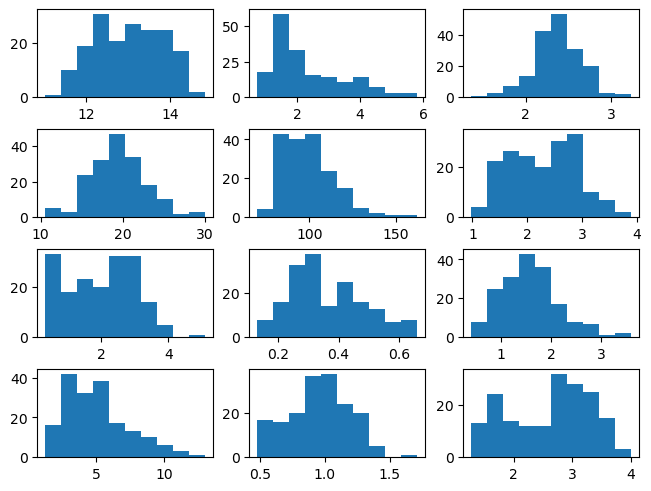

In [38]:
fig, axs = plt.subplots(4, 3, constrained_layout=True)
axs[0, 0].hist(df_wine[0])
axs[0, 1].hist(df_wine[1])
axs[0, 2].hist(df_wine[2])
axs[1, 0].hist(df_wine[3])
axs[1, 1].hist(df_wine[4])
axs[1, 2].hist(df_wine[5])
axs[2, 0].hist(df_wine[6])
axs[2, 1].hist(df_wine[7])
axs[2, 2].hist(df_wine[8])
axs[3, 0].hist(df_wine[9])
axs[3, 1].hist(df_wine[10])
axs[3, 2].hist(df_wine[11])

## 4) train, test 데이터 분리

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine_data,
                                                    wine_label,
                                                    shuffle=True,
                                                    test_size=0.2)
                                                    # random_state=1004)

In [40]:
X_train2.shape, y_train2.shape
# X_test2.shape, y_test2.shape

((142, 13), (142,))

## 5) 다양한 모델로 학습시켜보기

### 의사결정나무 (Decision Tree)

In [41]:
model_tree2 = DecisionTreeClassifier( criterion = 'entropy', 
    max_depth = 3, 
    min_samples_split = 2,
    min_samples_leaf=2,
    random_state=1004)
model_tree2.fit(X_train2, y_train2) # 의사결정나무 모델로 학습
y_pred1_2 = model_tree2.predict(X_test2) # 테스트 결과 예측

accuracy_tree2 = accuracy_score(y_test2, y_pred1_2)
accuracy_tree2 # 정확도 출력



0.8611111111111112

### 랜덤포레스트 (Random Forest)

In [42]:
model_rf2 = RandomForestClassifier(n_estimators=130, max_depth=8, random_state=1004)
model_rf2.fit(X_train2, y_train2)
pred2_2 = model_rf2.predict(X_test2)
accuracy_score(y_test2, pred2_2)
print(classification_report(y_test2, pred2_2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



### SVM (Support Vector Machine)

In [43]:
model_svm2 = svm.SVC(degree= 3 )
model_svm2.fit(X_train2, y_train2) # 훈련
y_pred3_2 = model_svm2.predict(X_test2) # 예측

print(classification_report(y_test2, y_pred3_2)) # 결과 지표를 확인
accuracy_score(y_test2, y_pred3_2)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.52      1.00      0.69        11
           2       0.50      0.09      0.15        11

    accuracy                           0.67        36
   macro avg       0.65      0.65      0.58        36
weighted avg       0.67      0.67      0.60        36



0.6666666666666666

### SGD (Stochastic Gradient Descent)

In [44]:
sgd_model2 = SGDClassifier(alpha=0.5, learning_rate='optimal') # 모델 객체 생성

print(sgd_model2._estimator_type) # 이 모델의 타입을 확인
sgd_model2.fit(X_train2, y_train2) # sgd모델로 훈련데이터로 훈련시킨다.


y_pred4_2 = sgd_model2.predict(X_test2)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test2, y_pred4_2, zero_division=0)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       1.00      0.27      0.43        11
           2       0.59      0.91      0.71        11

    accuracy                           0.72        36
   macro avg       0.80      0.70      0.67        36
weighted avg       0.80      0.72      0.69        36



SGD는 Mini-Batch를 사용하므로 대량의 데이터를 빨리 계산하는데는 유리하지만 조금 부정확할 수 있습니다. 이 와인 데이터셋은 크기도 작고 간격이 좁은 여러 피처들이 있으므로 정밀함이 필요하다고 생각했습니다. 따라서 SGD는 오차가 클 수밖에 없고 와인 클래스의 분류에는 어울리지 않는 것 같습니다. (참고 : https://mangkyu.tistory.com/62)

### Logistic Regression

In [45]:
logistic_model2 = LogisticRegression(max_iter=3000) # 모델 객체 생성

print(logistic_model2._estimator_type) # 이 모델의 타입을 확인

logistic_model2.fit(X_train2, y_train2) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred5_2 = logistic_model2.predict(X_test2) # 예측

print(classification_report(y_test2, y_pred5_2,)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      0.91      0.91        11
           2       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



TOTAL NO. of ITERATIONS REACHED LIMIT 은 데이터 분석을 마치기 전에 반복횟수의 한계에 도달했음을 의미합니다. 이럴 경우 max_iter을 증가시켜 줄 필요가 있습니다. 적은 반복횟수로 충분히 수행할 수 있도록 하고 싶다면 데이터를 정규화 한 후 예측하는 것도 좋은 방법이라고 합니다. (참고: https://stackoverflow.com/questions/67604304/total-no-of-iterations-reached-limit-in-scikit-learn)

## 6) 모델을 평가해 보기

로지스틱 회귀 모델을 이용한 다중분류는 특히 데이터의 개수가 작을 때 유리한 것 같습니다. 가장 우수한 성능을 보여 채택되었습니다. 와인의 클래스 분류는 미량 성분들의 함류량과 많이 관계가 있음을 알 수 있었습니다. 피처 중 한두개가 유난히 범위가 클 때 정규화를 거쳐 모델에 더 잘 맞는 데이터로 전처리할 수 있음을 알게 되었습니다. 이러한 전처리 방법이 로지스틱 회귀 모델과도 잘 어울린다고 생각했습니다. 이번 분류에서 accuracy는 핵심적인 지표가 아니라고 생각했습니다. 왜냐하면 실제로 데이터의 클래스는 총 3개뿐이며, 데이터 탐색 과정의 히스토그램을 바탕으로 클래스가 고루고루 있음을 알 수 있었기 때문입니다. 이 경우 세 개의 클래스 중 무조건 하나로만 판단하는 모델이 있더라도 제법 맞출 수 있을 것입니다.  
제가 중요하다고 생각하는 지표는 f1 스코어였습니다. 정밀도와 재현율을 동시에 고려한 지표이기 때문입니다. 실제로 예측한 클래스가 얼마나 들어맞는지, 정확히 예측한 것들의 비율이 얼마나 되는지를 함께 볼 수 있어서입니다.


# 3. Breast Cancer  Diagnoses

## 1) 필요한 모듈 import하기

앞선 분류에서 사용하였던 pandas, numpy, matplotlib, sklearn을 그대로 사용합니다.classification_report또한 꼭 필요한 모듈이며 그에 더해 오차 행렬을 더 자세히 살펴보고 싶으므로 confusion matrix 모듈을 import합니다.

In [46]:
from sklearn.metrics import confusion_matrix

## 2) 데이터 준비

In [47]:
from sklearn.datasets import load_breast_cancer

## 3) 데이터 이해하기

In [48]:
cancer_b = load_breast_cancer()

print(dir(cancer_b))
print(type(cancer_b)) #자료형 확인 
cancer_b.keys()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
print(cancer_b.feature_names)
print(cancer_b.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


30개의 피처들을 통해 알아내어야 할 target은 종양이 악성인지(malignant), 양성인지(benign) 입니다. **피처와 타겟의 이름을 출력**해 보고 나서 이진분류에 어울리는 모델을 생각해봅니다.

In [50]:
print(cancer_b.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [51]:
cancer_b_data = cancer_b.data
cancer_b_data.shape 

(569, 30)

In [52]:
df_cancer_b = pd.DataFrame(cancer_b_data)
df_cancer_b.head()
df_cancer_b.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [53]:
cancer_b_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

데이터를 불러 온 후 특징을 살핍니다. 특별히 표준편차가 큰 피처들이 있으므로 정규화를 해서 예측하는 것도 좋을 것 같습니다.

In [54]:
# 스케일러 선택
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()


# df_cancer_b = scaler.fit_transform(df_cancer_b)

In [55]:
df_cancer_b_corr = df_cancer_b
df_cancer_b_corr['diagnosis'] = cancer_b.target

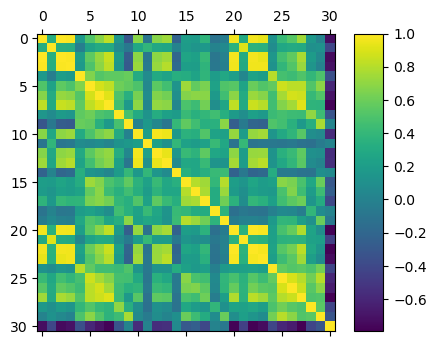

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,diagnosis
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.35856,-0.596534,-0.69636,-0.776614,-0.330499,0.012838,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.65961,-0.793566,-0.416294,-0.323872,1.0


In [56]:
hmap = df_cancer_b.corr(method='pearson')
plt.matshow(hmap)
plt.colorbar(shrink=0.8, aspect=10)

plt.show()

df_cancer_b_corr.corr().tail(1)

각 피처와 진단결과의 상관관계를 확인했습니다. 9, 11, 14, 18, 19번째 피처는 상관계수가 0에 매우 가까움을 확인했습니다.
때로는 지나치게 많은 컬럼이 오버피팅을 발생시키기도 하므로 drop하기로 결정했습니다.

In [57]:
cancer_b_data = np.delete(cancer_b_data, 9 , axis = 1)
cancer_b_data = np.delete(cancer_b_data, 11 , axis = 1)
cancer_b_data = np.delete(cancer_b_data, 14 , axis = 1)
cancer_b_data = np.delete(cancer_b_data, 18 , axis = 1)
cancer_b_data = np.delete(cancer_b_data, 19 , axis = 1)

In [58]:
df_cancer_b_corr = df_cancer_b
df_cancer_b_corr['diagnosis'] = cancer_b.target
df_cancer_b_corr.corr().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,diagnosis
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.35856,-0.596534,-0.69636,-0.776614,-0.330499,0.012838,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.65961,-0.793566,-0.416294,-0.323872,1.0


In [59]:
cancer_b_label = cancer_b.target 
print(cancer_b_label.shape)

(569,)


## 4) train, test 데이터 분리

이제 전처리된 데이터를 학습할 데이터와 검증할 데이터로 나누겠습니다.

In [60]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(cancer_b_data,
                                                    cancer_b_label,
                                                    shuffle=True,
                                                    test_size=0.2,
                                                    random_state=1004)

In [61]:
X_train3.shape, y_train3.shape

((455, 25), (455,))

## 5) 다양한 모델로 학습시켜보기

### 의사결정나무 (Decision Tree)

In [62]:
model_tree3 = DecisionTreeClassifier( criterion = 'entropy', 
    max_depth = 3, 
    min_samples_split = 2,
    min_samples_leaf=2,
    random_state=1004)
model_tree3.fit(X_train3, y_train3) # 의사결정나무 모델로 학습
y_pred1_3 = model_tree3.predict(X_test3) # 테스트 결과 예측

accuracy_tree3 = accuracy_score(y_test3, y_pred1_3)
accuracy_tree3 # 정확도 출력



0.9122807017543859

### 랜덤포레스트 (Random Forest)

In [63]:
model_rf3 = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1004)
model_rf3.fit(X_train3, y_train3)
pred2_3 = model_rf3.predict(X_test3)
accuracy_score(y_test3, pred2_3)
print(classification_report(y_test3, pred2_3))


              precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.91      0.97      0.94        63

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



### SVM (Support Vector Machine)

In [64]:
model_svm3 = svm.SVC( C=1000, kernel='linear')
model_svm3.fit(X_train3, y_train3) # 훈련
y_pred3_3= model_svm3.predict(X_test3) # 예측

print(classification_report(y_test3, y_pred3_3)) # 결과 지표를 확인
accuracy_score(y_test3, y_pred3_3)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        51
           1       0.89      1.00      0.94        63

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



0.9298245614035088

### SGD (Stochastic Gradient Descent)

In [65]:
sgd_model3 = SGDClassifier(alpha=0.12) # 모델 객체 생성

print(sgd_model3._estimator_type) # 이 모델의 타입을 확인
sgd_model3.fit(X_train3, y_train3) # sgd모델로 훈련데이터로 훈련시킨다.


y_pred4_3 = sgd_model3.predict(X_test3)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test3, y_pred4_3)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       0.61      0.96      0.75        51
           1       0.94      0.51      0.66        63

    accuracy                           0.71       114
   macro avg       0.78      0.73      0.70       114
weighted avg       0.79      0.71      0.70       114



### Logistic Regression

In [66]:
logistic_model3 = LogisticRegression(max_iter=4000) # 모델 객체 생성

print(logistic_model3._estimator_type) # 이 모델의 타입을 확인

logistic_model3.fit(X_train3, y_train3) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred5_3 = logistic_model3.predict(X_test3) # 예측

print(classification_report(y_test3, y_pred5_3,)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        51
           1       0.90      0.98      0.94        63

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## 6) 모델을 평가해 보기

In [67]:
print(confusion_matrix(y_test3, y_pred1_3))
print('==============================================')
print(confusion_matrix(y_test3, pred2_3))
print('==============================================')
print(confusion_matrix(y_test3, y_pred3_3))
print('==============================================')
print(confusion_matrix(y_test3, y_pred4_3))
print('==============================================')
print(confusion_matrix(y_test3, y_pred5_3))


[[42  9]
 [ 1 62]]
[[45  6]
 [ 2 61]]
[[43  8]
 [ 0 63]]
[[49  2]
 [31 32]]
[[44  7]
 [ 1 62]]


암 진단에서 핵심적인 것은 첫번째로 recall이라고 생각했습니다. 실제 악성세포를 가지고 있는 사람들 중에 실제로 얼마나 악성으로 진단을 받았는지에 대한 지표이기 때문입니다. 혹여 잘못 진단을 해 암이 아닌 사람도 암으로 진단하였다면 재검사를 거쳐서 알 수 있겠지만, 암이었음에도 진단하지 못한다면 큰일이기 때문입니다.

안타깝게도 제 모델은 recall 지표가 전체적으로 낮은 점수를 가리킵니다. 오차행렬을 확인하여 그나마 나은 스코어를 보이는 랜덤포레스트를 선택하겠습니다. 데이터 전처리 과정에서 합리적이지 못한 부분이 있었다고 생각되어 회고에 기록하겠습니다.

# 4. Discussion

- SVM 모델은 원래 이중 분류 모델으로 소개되었습니다. 하지만 OvO, OvR 방식과 차원축소등으로 다중 분류모델로서의 기능도 충분히 할 수 있음을 알게 되었습니다. 클래스가 두개인 경우, 혹은 피처가 두개인 경우는 PCA와 mlxtend 라이브러리를 통해서 쉽게 시각화 할 수 있었지만 MNIST 분류는 피처가 64개나 되고 클래스도 10개라서 어려웠습니다. 2차원의 평면에 분류 결과를 표현할 수 없어서 아쉬웠고 꼭 시도해보고 싶습니다.(SVM 모델의 시각화를 통해 분류된 데이터의 정확도를 더 쉽게 이해할 수 있습니다, 참고: https://jimmy-ai.tistory.com/32)  

In [68]:
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)

y_find = df_digits['number']
y_find.shape

(1797,)

In [69]:
from mlxtend.plotting import category_scatter

- 데이터의 특징에 따라 어떤 모델이 어울릴지 생각해보는 판단능력이 미흡하다는 생각이 많이 들었습니다.피처의 개수나 클래스의 개수, 데이터의 활용 목적과 의미, 기술통계량들을 바탕으로 한 전체적인 분포 등을 고려해 보아야 합니다. 그를 통해 어떤 모델이 논리적으로 어울릴 것인가 예측해보는 연습을 해 보아야겠다고 생각했습니다. 분류 모델들의 알고리즘을 더 공부하여 좀 더 적절하게 모델들을 이용할 수 있도록 해야겠다고 생각했습니다. 예를 들어 MNIST 분류 모델의 경우 다중분류에 강한 랜덤포레스트, 로지스틱 회귀등을 먼저 생각해 볼 수 있는 것처럼, 데이터 성격과 모델의 특성을 잘 파악하고 있으면 분석을 더 잘 할 수 있을 것 같습니다.

- 와인 분류 모델에서 Logistic regression 알고리즘이 정확도가 매우 높아서 다른 부분을 건드리지 않았습니다. 로지스틱 회귀 분류에서는 L1, L2 규제를 조절하는 하이퍼파라미터 C를 적절히 설정함으로써 그 성능을 높일 수 있습니다. 적절한 하이퍼 파라미터를 설정하는 연습을 더 해 보고 싶습니다.  

- 와인분류 모델에서 오차 행렬을 통한 지표 외에 roc-auc 곡선도 활용해 보고 싶었습니다. 기회가 된다면 적절한 지표를 더 다양하게 써 보고 싶습니다.

- 암 진단 모델은 아쉬움이 많이 남는 모델이었습니다. 전체적으로 모델들의 정확도가 95%이하로 낮았기 때문입니다. 이는 정확한 판단을 요구하는 의료분야에는 적합하지 않다고 볼 수 있습니다. 모델의 성능이 낮은 이유로는 데이터 전처리 과정상의 문제라고 예측됩니다. 오버피팅을 방지하기 위해 상관계수가 낮은 피처를 삭제했는데 그 과정에서 데이터의 학습에 문제가 되는 부분이 생긴 것 같습니다. 피처 중 일부를 삭제하지 않고 수행했을 때 더 높은 정확성을 기대할 수 있습니다.

- 모델의 하이퍼파라미터를 설정하는 데 어려움이 있었습니다. 옵티마이저의 활용을 더 잘 해야겠다고 생각합니다. 특히 SVM의 경우 커널 종류에 따라 하이퍼파라미터의 영향을 매우 많이 받는다는 것을 알 수 있었습니다. SGD도 경사하강법에 의해 계산해 나가는 방식이므로 하이퍼파라미터를 더 잘 설정해야 한다고 생각합니다.

- 전체적으로 아쉬움이 많이 남는 프로젝트였습니다. 데이터를 불러오고 처리하고, 기본적인 모델에 적용하는 수순이 자연스러워져야 어떤 모델을 고르고 하이퍼파라미터를 어떻게 설정할지에 더욱 신경을 쓸 수 있는 시간이 늘어납니다. 연습을 많이 해야겠다고 느꼈습니다.

# 5. References

https://scikit-learn.org/stable/datasets.html (데이터셋의 정보)  
https://ratsgo.github.io/machine%20learning/2017/03/26/tree/ (의사결정나무)  
https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline (맷플롯립 inline 이미지화)  
https://rk1993.tistory.com/entry/%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8  
https://dongsam-memo.tistory.com/24 (SVM 모델의 다중 분류)  
https://mangkyu.tistory.com/62) (SGD 배치 사이즈)  
https://stackoverflow.com/questions/67604304/total-no-of-iterations-reached-limit-in-scikit-learn (max_iter 워닝)  
https://jimmy-ai.tistory.com/32 (svm 모델 시각화)

